# 🧼 01_clean_and_explore.ipynb

This notebook loads, cleans, and explores Las Vegas tourism data from LVCVA.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '../data/LVCVA Data.xlsx'
df_raw = pd.read_excel(file_path)

# Preview raw format
df_raw.head()


,Tourism Indicators,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,...,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00
0,Visitor Volume,2474800.000,2616600.000,3334700.000,3382200.000,3446900.000,3324800.000,3491600.000,3190600.000,3355200.000,...,3389100.000,3564800.000,3313700.000,3405700.000,3344600.000,2973300.000,3386800.000,3335900.000,3418700.000,3094800.000
1,Convention Attendance,298200.000,439000.000,494200.000,377400.000,391100.000,469100.000,325000.000,394100.000,372600.000,...,527200.000,559200.000,548200.000,279200.000,628800.000,615400.000,533900.000,573600.000,511200.000,374600.000
2,Available Room Inventory,150487.000,150702.000,150693.000,150495.000,151703.000,151523.000,151352.000,151116.000,150856.000,...,150679.000,150646.000,150859.000,150612.000,150325.000,150509.000,150757.000,150818.000,150909.000,150220.000
3,Total Occupancy,0.593,0.693,0.806,0.840,0.826,0.827,0.834,0.768,0.831,...,0.839,0.857,0.814,0.819,0.819,0.805,0.829,0.845,0.830,0.787
4,Weekend Occupancy,0.746,0.875,0.921,0.932,0.919,0.900,0.911,0.901,0.921,...,0.904,0.946,0.891,0.889,0.856,0.864,0.908,0.938,0.899,0.876


## 🧹 Clean the Data
We'll standardize the date headers and reshape the data into tidy long format.

In [2]:

# Extract indicators and values
indicators = df_raw.iloc[:, 0]
data = df_raw.iloc[:, 1:]

# Standardize date headers
def parse_column(col):
    try: return pd.to_datetime(col)
    except: return pd.to_datetime(str(col), errors='coerce', format='%b-%y')

data.columns = [parse_column(c) for c in data.columns]

# Reshape into long format
df_cleaned = pd.DataFrame(data.values.T, columns=indicators)
df_cleaned['date'] = data.columns
df_long = df_cleaned.melt(id_vars='date', var_name='indicator', value_name='value').dropna()

# Preview clean data
df_long.head()


,date,indicator,value
0,2022-01-01,Visitor Volume,2474800.0
1,2022-02-01,Visitor Volume,2616600.0
2,2022-03-01,Visitor Volume,3334700.0
3,2022-04-01,Visitor Volume,3382200.0
4,2022-05-01,Visitor Volume,3446900.0


## 📊 Plot: Visitor Volume Over Time

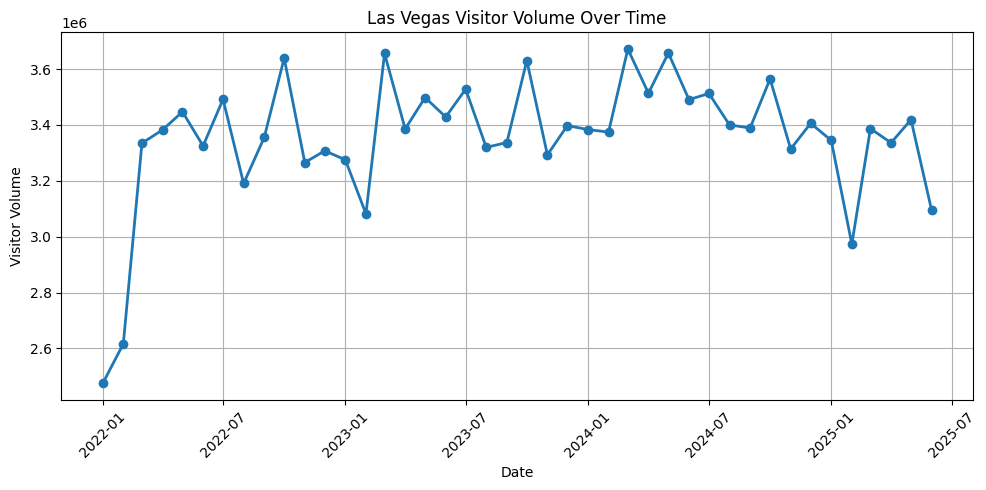

In [3]:

df_visitors = df_long[df_long['indicator'] == 'Visitor Volume']

plt.figure(figsize=(10,5))
plt.plot(df_visitors['date'], df_visitors['value'], marker='o', linewidth=2)
plt.title("Las Vegas Visitor Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Visitor Volume")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Plot: Total vs Weekend Occupancy

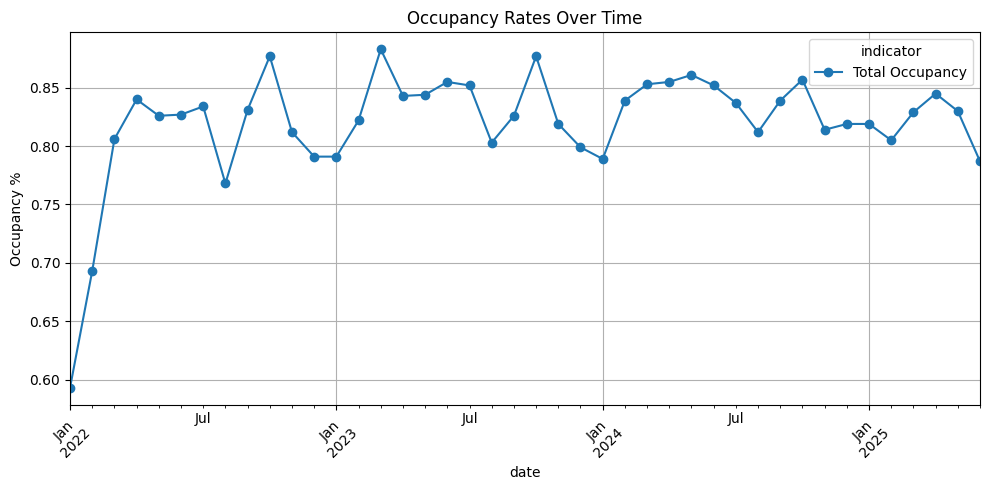

In [4]:

df_occ = df_long[df_long['indicator'].isin(['Total Occupancy', 'Weekend Occupancy'])]
pivoted = df_occ.pivot(index='date', columns='indicator', values='value')

pivoted.plot(figsize=(10,5), marker='o')
plt.title("Occupancy Rates Over Time")
plt.ylabel("Occupancy %")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
